In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time
import re
import igraph as ig
import leidenalg as la
import networkx as nx
from operator import itemgetter
import warnings
import matplotlib.cm as mcm
import community
from community import community_louvain as cm

In [2]:
destination_path = "C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Tweets/"

## Quotes (where screen name is available)

In [35]:
quotes = pd.read_parquet(destination_path + "quotes_w_names.parquet", engine="fastparquet")
quotes

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count,quoted_screen_name
0,1221728158371786752,1221728158371786752,Mon Jan 27 09:34:26 +0000 2020,836069429209227264,italyinkz,True,Mon Feb 27 04:24:20 +0000 2017,"#27gennaio \n""Coltivare la Memoria è ancora og...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,"[{'text': '27gennaio', 'indices': [0, 10]}, {'...",[],[],"[{'url': 'https://t.co/mlmAR0xufR', 'expanded_...",[],[],NaN,NaN,NaN,Quirinale
1,1221734125725540352,1221734125725540352,Mon Jan 27 09:58:08 +0000 2020,59720254,_teo777,False,Fri Jul 24 07:35:06 +0000 2009,"Piove, novacse ladro!\n\n""Avete fatto vincere""...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],[],[],"[{'url': 'https://t.co/RjXrEYu3yv', 'expanded_...",[],[],NaN,NaN,NaN,lameduck1960
2,1221731531640778752,1221731531640778752,Mon Jan 27 09:47:50 +0000 2020,2657061966,saradellamonaca,False,Fri Jul 18 16:20:52 +0000 2014,"""Coltivare la Memoria è ancora oggi un vaccino...","<a href=""http://twitter.com/download/android"" ...",None,...,"[{'text': '27gennaio', 'indices': [227, 237]},...",[],[],"[{'url': 'https://t.co/COW1n3Fkjk', 'expanded_...",[],[],NaN,NaN,NaN,Quirinale
3,1221725288196907010,1221725288196907010,Mon Jan 27 09:23:01 +0000 2020,245960120,Rog_2,False,Tue Feb 01 20:50:31 +0000 2011,Scherzi? NATURALMENTE è un virus messo a punto...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],[],[],"[{'url': 'https://t.co/gMncn8kVvz', 'expanded_...",[],[],NaN,NaN,NaN,alinomilan
4,1221702926554583045,1221702926554583045,Mon Jan 27 07:54:10 +0000 2020,2569063746,elisabettacost8,False,Sun Jun 15 14:03:57 +0000 2014,Per il Morbillo il vaccino esiste sarebbe suff...,"<a href=""http://twitter.com/download/android"" ...",None,...,[],[],[],"[{'url': 'https://t.co/LALAZBPYEo', 'expanded_...",[],[],NaN,NaN,NaN,A54ferraresi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192496,1394609382399397890,1394609382399397890,Tue May 18 11:02:42 +0000 2021,4540112892,LalliVincenzo,False,Sat Dec 12 18:38:55 +0000 2015,I nazi fasci tirano i dadi e sproloquiano...\n...,"<a href=""http://twitter.com/download/android"" ...",None,...,[],[],[],"[{'url': 'https://t.co/Vz56I6q2Yv', 'expanded_...",[],[],93448.0,8540.0,7781.0,GiovaValentini
192497,1394609717150986242,1394609717150986242,Tue May 18 11:04:01 +0000 2021,1031670196342325249,augusto8589,False,Mon Aug 20 22:31:57 +0000 2018,"@BimbiMeb Ad esempio, la cogliona con la bandi...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],[],"[{'screen_name': 'BimbiMeb', 'name': 'bimbi di...","[{'url': 'https://t.co/5lQCRCs2El', 'expanded_...",[],[],2815.0,158.0,72.0,BimbiMeb
192498,1394609761941921793,1394609761941921793,Tue May 18 11:04:12 +0000 2021,3031108244,InMonsterland,False,Thu Feb 19 18:36:18 +0000 2015,Capito la non logica di questi? https://t.co/Q...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],[],[],"[{'url': 'https://t.co/QDxocGtG98', 'expanded_...",[],[],54859.0,979.0,2858.0,valy_s
192499,1394609630542811138,1394609630542811138,Tue May 18 11:03:41 +0000 2021,1402708182,BansCollector,False,Sat May 04 16:15:39 +0000 2013,"@stebaraz Quando hai voglia e tempo, che ne pe...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],[],"[{'screen_name': 'stebaraz', 'name': 'Stefano ...","[{'url': 'https://t.co/2bHtlPR7dG', 'expanded_...",[],[],51214.0,1532.0,1087.0,Linkiesta


##### Check self quotes

In [9]:
self_quotes_df = quotes_with_screen_name_no_nan[quotes_with_screen_name_no_nan['user_screen_name']==quotes_with_screen_name_no_nan['quoted_user_screen_name']]
print('self_quotes: ',len(self_quotes_df))

self_quotes:  11081


In [10]:
len(self_quotes_df['user_screen_name'].unique())

3277

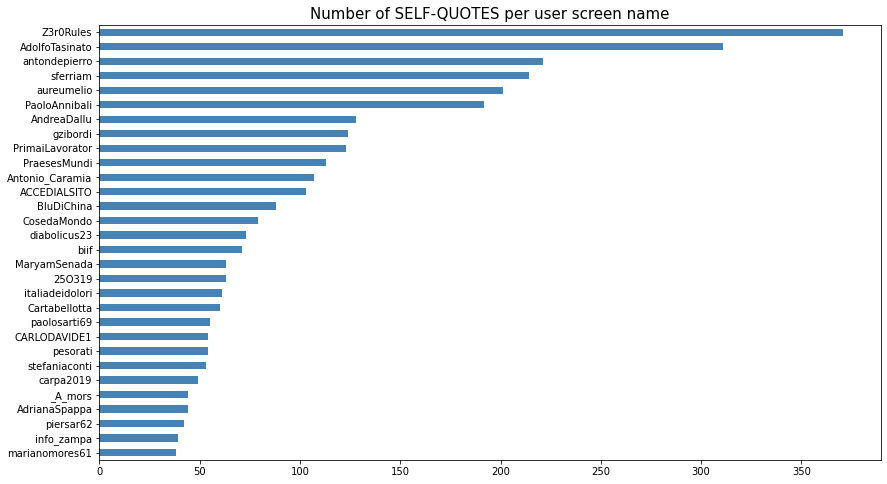

In [11]:
fig = plt.figure(figsize=(14, 8))
ax = self_quotes_df['user_screen_name'].value_counts(ascending=False)[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Number of SELF-QUOTES per user screen name', fontsize=15)
ax.invert_yaxis()
plt.show()

In [12]:
self_quotes_df_per_user_screen_name = self_quotes_df.groupby("user_screen_name")['user_screen_name']
self_quotes_df_per_user_screen_name_variable = self_quotes_df_per_user_screen_name.count().sort_values(ascending=False)
self_quotes_df_per_user_screen_name_variable.head(30)

user_screen_name
Z3r0Rules          371
AdolfoTasinato     311
antondepierro      221
sferriam           214
aureumelio         201
PaoloAnnibali      192
AndreaDallu        128
gzibordi           124
PrimaiLavorator    123
PraesesMundi       113
Antonio_Caramia    107
ACCEDIALSITO       103
BluDiChina          88
CosedaMondo         79
diabolicus23        73
biif                71
25O319              63
MaryamSenada        63
italiadeidolori     61
Cartabellotta       60
paolosarti69        55
pesorati            54
CARLODAVIDE1        54
stefaniaconti       53
carpa2019           49
_A_mors             44
AdrianaSpappa       44
piersar62           42
info_zampa          39
lucabattanta        38
Name: user_screen_name, dtype: int64

# NETWORK

In [39]:
quotes_graph = nx.from_pandas_edgelist(quotes,'user_screen_name','quoted_screen_name', create_using=nx.DiGraph())
print(nx.info(quotes_graph))

DiGraph with 47208 nodes and 150805 edges


In [21]:
degrees = [val for (node, val) in quotes_graph.degree()]

print(f"The maximum degree of the Graph is {np.max(degrees)}")   
print(f"The minimum degree of the Graph is {np.min(degrees)}")

out_degrees = [val for (node, val) in quotes_graph.out_degree()]

print(f"The maximum out_degree of the Graph is {np.max(out_degrees)}")   
print(f"The minimum out_degree of the Graph is {np.min(out_degrees)}")

in_degrees = [val for (node, val) in quotes_graph.in_degree()]

print(f"The maximum in_degree of the Graph is {np.max(in_degrees)}")   
print(f"The minimum in_degree of the Graph is {np.min(in_degrees)}")

The maximum degree of the Graph is 2366
The minimum degree of the Graph is 1
The maximum out_degree of the Graph is 279
The minimum out_degree of the Graph is 0
The maximum in_degree of the Graph is 2366
The minimum in_degree of the Graph is 0


In [49]:
degree_dict = dict(quotes_graph.degree(quotes_graph.nodes()))
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [52]:
lst_name = []
lst_degree = []
from tqdm.notebook import tqdm
for d in tqdm(sorted_degree):
    lst_name.append(d[0])
    lst_degree.append(d[1])
pd.DataFrame(list(zip(lst_name, lst_degree)), columns=["user", "degree"]).to_csv(path_leiden+"degree_quotes.csv", line_terminator="\n", index=False, encoding="utf-8")

In [25]:
in_degree_dict = dict(quotes_graph.in_degree(quotes_graph.nodes()))
sorted_in_degree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)

### In Degree

In [27]:
n=5
print("Top n nodes by in_degree:")
for d in sorted_in_degree[:n]:
    print(f"the node with name {d[0]} , has a in-degree of {d[1]}")

Top n nodes by in_degree:
the node with name Corriere , has a in-degree of 2366
the node with name SkyTG24 , has a in-degree of 2183
the node with name repubblica , has a in-degree of 2168
the node with name Adnkronos , has a in-degree of 1926
the node with name Agenzia_Ansa , has a in-degree of 1885


### Out Degree

In [28]:
out_degree_dict = dict(quotes_graph.out_degree(quotes_graph.nodes()))
sorted_out_degree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)

In [29]:
n=5
print("Top n nodes by out_degree:")
for d in sorted_out_degree[:n]:
    print(f"the node with name {d[0]} , has a out-degree of {d[1]}")

Top n nodes by out_degree:
the node with name CosaInTendenza , has a out-degree of 279
the node with name 25gennaio1 , has a out-degree of 223
the node with name mariamworldart , has a out-degree of 218
the node with name ManuQ24916888 , has a out-degree of 203
the node with name Lucia39134555 , has a out-degree of 185


## Communities with Leiden

In [45]:
quote_df = quotes[["user_screen_name", "quoted_screen_name"]]
tuples = [tuple(x) for x in quote_df.values]
retweets_graph = ig.Graph.TupleList(tuples, directed = True)
n_vertices = retweets_graph.vcount()
print("Number of vertices:", n_vertices)
print("Number of edges:", retweets_graph.ecount())
print("Density of the graph:", 2*retweets_graph.ecount()/(retweets_graph.vcount()*(retweets_graph.vcount()-1)))
total_degree=0
total_indegree = 0
total_outdegree = 0
for n in range(n_vertices):
    total_degree += retweets_graph.degree(n)
    total_indegree += retweets_graph.indegree(n)
    total_outdegree += retweets_graph.outdegree(n)
print("Average indegree:", total_indegree/n_vertices)
print("Average outdegree:", total_outdegree/n_vertices)
partition = la.find_partition(retweets_graph, la.ModularityVertexPartition)
zip_iterator = zip(retweets_graph.vs()["name"], partition.membership)
best_part = dict(zip_iterator)
path_leiden = "C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Files/"
lst_user = []
lst_comm = []
for i in best_part:
    lst_user.append(i)
    lst_comm.append(best_part[i])
pd.DataFrame(list(zip(lst_user, lst_comm)), columns=["user", "community"]).to_csv(path_leiden+"leiden_quotes.csv", line_terminator="\n", index=False, encoding="utf-8")

Number of vertices: 47208
Number of edges: 192501
Density of the graph: 0.00017275911953679675
Average indegree: 4.077719877986782
Average outdegree: 4.077719877986782


In [46]:
leiden = pd.read_csv(path_leiden+"leiden_quotes.csv")
leiden

,user,community
0,italyinkz,6
1,Quirinale,6
2,_teo777,1
3,lameduck1960,0
4,saradellamonaca,6
...,...,...
47203,QuantaClub,1230
47204,redsbi,1230
47205,oneformababy,2
47206,CioppyKr,2


Le prime 10 community contengono il 77.97% degli utenti


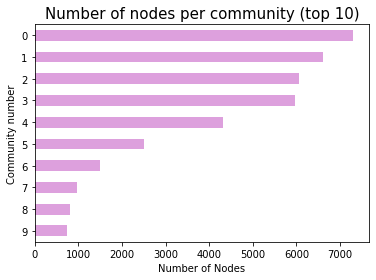

In [47]:
val = pd.Series(leiden["community"]).value_counts().sort_values(ascending=False)
total = 0
for i in val[:10]:
    total = total + i
print(f"Le prime 10 community contengono il {round(total/len(leiden)*100,2)}% degli utenti")
fig = plt.figure() #figsize=(14, 8)
ax = val[:10].plot(kind='barh', color='plum', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of nodes per community (top 10)', fontsize=15)
ax.invert_yaxis()
ax.set_ylabel("Community number")
ax.set_xlabel("Number of Nodes")
plt.show()

In [48]:
comm_0 = list(leiden[leiden["community"]==0]["user"])
comm_1 = list(leiden[leiden["community"]==1]["user"])
comm_2 = list(leiden[leiden["community"]==2]["user"])
comm_3 = list(leiden[leiden["community"]==3]["user"])
comm_4 = list(leiden[leiden["community"]==4]["user"])

In [56]:
degree = pd.read_csv(path_leiden+"degree_quotes.csv")
cont = 0
value = 30
print("Community 0:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_0:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 1:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_1:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 2:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_2:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 3:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_3:
        print(item.user)
        cont = cont + 1
cont = 0
print("-----------")
print("Community 4:")
for item in degree.itertuples():
    if cont == value:
        break
    if item.user in comm_4:
        print(item.user)
        cont = cont + 1

Community 0:
ImolaOggi
myrtamerlino
valy_s
RadioSavana
noitre32
BarbaraRaval
borghi_claudio
ladyonorato
pbecchi
cris_cersei
lameduck1960
LegaSalvini
NicolaPorro
GuidoCrosetto
barbarab1974
francescatotolo
vfeltri
byoblu
FmMosca
tempoweb
a_meluzzi
MinutemanItaly
GiancarloDeRisi
doluccia16
sabrimaggioni
fdragoni
PraesesMundi
_cieloitalia
25O319
LiciaRonzulli
-----------
Community 1:
Corriere
SkyTG24
repubblica
Adnkronos
Agenzia_Ansa
HuffPostItalia
TgLa7
MediasetTgcom24
LaStampa
sole24ore
RaiNews
ilmessaggeroit
Agenzia_Italia
_DAGOSPIA_
CosaInTendenza
Deiana_Luca9
eziomauro
lucabattanta
Affaritaliani
alde68
Deputatipd
mattinodinapoli
DAVIDPARENZO
salomone_l
donnadimezzo
DottAngeloC
AndreaVenanzoni
RepubblicaTv
V_Mannello
twittingelenaa
-----------
Community 2:
matteorenzi
CottarelliCPI
jacopo_iacoboni
nzingaretti
piersileri
riotta
claudiocerasa
sbonaccini
CarloCalenda
Iperbole_
giorgio_gori
Miti_Vigliero
pfmajorino
AugustoMinzolin
raffaellapaita
lageloni
TeresaBellanova
PoliticaPerJedi
Zet

In [66]:
quote = quotes[["user_screen_name", "quoted_screen_name"]]
merge_prova = quote.merge(leiden, left_on="user_screen_name", right_on="user", how="left")
merge_prova2 = merge_prova.merge(leiden, left_on="quoted_screen_name", right_on="user", how="left")
lst = [0,1,2,3,4]
final2 = merge_prova2[merge_prova2["community_x"].isin(lst) & merge_prova2["community_y"].isin(lst)]
x = list(set(final2["user_screen_name"]))
y = list(set(final2["quoted_screen_name"]))
x.extend(y)
x = list(set(x))
names2 = pd.DataFrame(x, columns=["name"])
m2 = names2.merge(leiden, left_on="name", right_on="user", how="left")
m2 = m2[["name", "community"]]
lst_Id = []
lst_Label = []
lst_Community = []
cont = 0
for i in m2.itertuples():
    lst_Id.append(cont)
    cont = cont + 1
    lst_Label.append(i.name)
    lst_Community.append(i.community)
df_nodes = pd.DataFrame(list(zip(lst_Id, lst_Label, lst_Community)), columns=["Id", "Label", "Community"])
mm = final2.merge(df_nodes, left_on="user_screen_name", right_on="Label", how="left")
mm = mm.merge(df_nodes, left_on="quoted_screen_name", right_on="Label", how="left")
mm = mm[["Id_x", "Id_y", "Label_x", "Label_y"]]
mm.rename(columns={'Id_x': 'Source', 'Id_y': 'Target', 'Label_x': 'From', 'Label_y': 'To' }, inplace=True)
df_nodes.to_csv("C:/Users/gianl/Desktop/names_quotes.csv", line_terminator="\n", index=False, encoding="utf-8")
mm.to_csv("C:/Users/gianl/Desktop/user_rtuser_quotes.csv", line_terminator="\n", index=False, encoding="utf-8")